In [1]:
%matplotlib inline
from src.get_data import symbols2daily_values, daily_values2filtered, df2get_batch
from src.analysis import LearningSequence
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [2]:
df = daily_values2filtered(symbols2daily_values())

term_dict = {
    'train': ['2011-01-01', '2014-12-31'],
    'valid': ['2015-01-01', '2015-12-31'],
    'test' : ['2016-01-01', '2016-12-31']
}
features, labels, terms = df2get_batch(df, term_dict)

In [3]:
# learner = LearningSequence(features, labels, terms, model_path='./exp_outcome/keras_model.h5')
learner = LearningSequence(features, labels, terms)
learner.sturcts_layer([3])

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
convolution1d_1 (Convolution1D)  (None, 4, 468)        657540      convolution1d_input_1[0][0]      
____________________________________________________________________________________________________
lstm_1 (LSTM)                    (None, 468)           1754064     convolution1d_1[0][0]            
Total params: 2411604
____________________________________________________________________________________________________


In [4]:
%time learner.inference(nb_epoch=100)

inference...
CPU times: user 6.83 s, sys: 1.4 s, total: 8.23 s
Wall time: 8.14 s


whole profit ration is 1.008


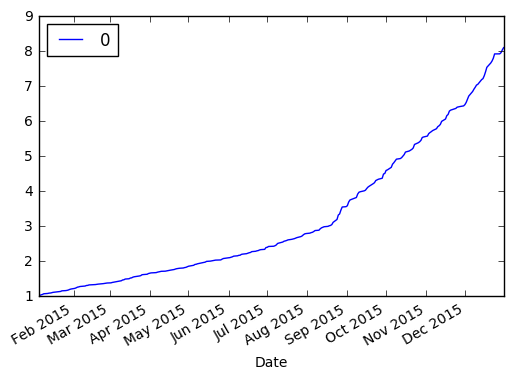

In [5]:
profit = learner.plot_profit()

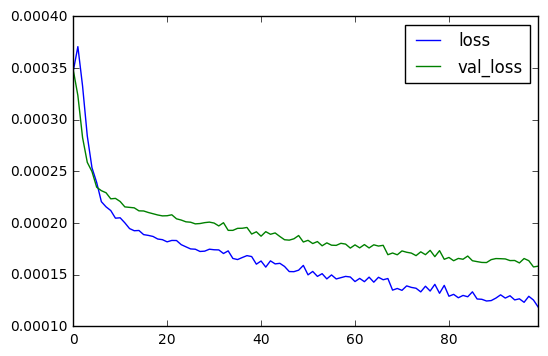

In [6]:
learner.plot_learning_curve()

whole accuracy is 0.75


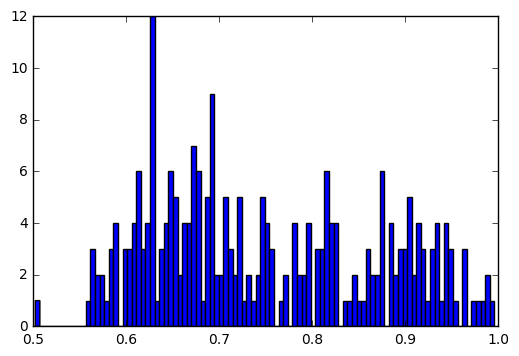

In [7]:
learner.plot_direction_accuracy()

In [150]:
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))


AttributeError: module 'pydot' has no attribute 'find_graphviz'